In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import re
import spacy
spacy.cli.download('it_core_news_sm')
nlp = spacy.load('it_core_news_sm')
import  nltk
print(nltk.__version__)

✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
3.7


In [3]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
import keras.utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import Model
from keras.utils import to_categorical
from keras.utils import pad_sequences 

#Importing the italian song dataset

In [5]:
with open ('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_it.pkl', mode='br') as inputfile:
  df_it = pickle.load(inputfile)

In [6]:
df_it.shape

(808, 5)

In [7]:
df_it = df_it.reset_index()
df_it = df_it.drop(['index'], axis = 1)

In [8]:
df_it

,Artist,Song,Genre,Language,Lyrics
0,alesana,before him all shall scatter,Metal,it,vid io piú di mille anime distrutte fuggir cos...
1,alice in chains,down in a hole (tablatura),Rock,it,tuned down a half step chords given in regular...
2,angra,era,Metal,it,era an ti meo ero rente mie i mero ti taro in ...
3,bryan adams,io vivo in te,Rock,it,vorrei vederti anche un attimo e senza parole ...
4,cliff richard and the shadows,dicitencello vuie!,Rock,it,dicitencello vuie di e fusco r falvo ed la can...
...,...,...,...,...,...
803,arisa,la domenica dell'anima,Pop,it,la luce inonda la tua stanza appari fragile co...
804,arisa,minidonna,Pop,it,che uomo sei sei un uomo mi piace quando fumi ...
805,daf,co co pino,Electronic,it,ay pepitita eres mi chiquita eres mi chiquita ...
806,alborosie,no cocaine,Electronic,it,marijuana ganja farmer no coca no coca no coca...


#Splitting the dataset in training set and test set

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
it_train, it_test = sklearn.model_selection.train_test_split(df_it, test_size=0.20, train_size=0.80)

In [11]:
it_train.shape, it_test.shape

((646, 5), (162, 5))

In [12]:
df_it['Genre'].value_counts() 

Pop           653
Rock           88
Metal          39
Jazz           13
Indie          12
Electronic      2
Folk            1
Name: Genre, dtype: int64

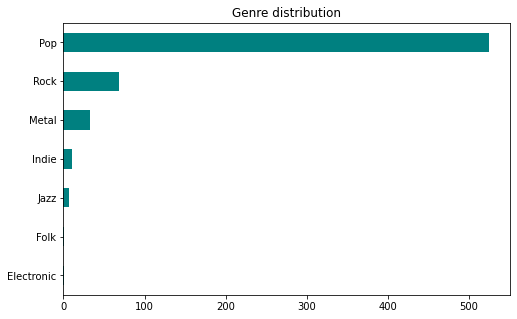

In [13]:
plt.rcParams['figure.figsize'] = [8,5]
x = it_train['Genre'].value_counts().sort_values(ascending = True)
plt.title("Genre distribution")
x.plot(kind ='barh', color="teal")

#Tokenizing the lyrics with spacy

In [14]:
x_train = it_train['Lyrics'].tolist()
y_train = it_train['Genre'].tolist()

In [15]:
x_test = it_test['Lyrics'].tolist()
y_test = it_test['Genre'].tolist()

In [16]:
len(x_train), len(y_train), len(x_test), len(y_test)

(646, 646, 162, 162)

In [17]:
set(y_train)

{'Electronic', 'Folk', 'Indie', 'Jazz', 'Metal', 'Pop', 'Rock'}

In [18]:
sample_idx = 79
x_train[sample_idx]

'sick luke sick luke cosa ne fai di questa notte qua se puoi rubarne un altra identica non piove mai fuori dalla citta sara per questo che non voglio andare via che cosa cazzo stai ridendo a fare cioe non e che mi da fastidio ma quando ti guardo ridi sempre e vorrei saperne il motivo ti faccio ridere dillo se c hai il coraggio ma dimmelo in faccia ridere spesso e la tua corazza parlando sempre di com e di come sarebbe ho poi dimenticato quando finisce settembre ti ho regalato le rose come un diciottenne che non ho avuto la testa di organizzare niente mi aggiusto i capelli dentro ogni specchio a caso va bene anche il riflesso nei finestrini delle auto non sono bello ma ho imparato da chi mi ha lasciato che dell aspetto con il tempo non ci fai piu caso pero insomma ci provo ed ogni volta che ritorno fanno festa come se avessero vinto l oro io sulle mie pero ti strappo un sorriso perche alla fine ho deciso che non la sbaglio di nuovo potremmo stare qui a pensarci perdere tempo per sognarc

In [19]:
y_train[sample_idx]

'Indie'

In [20]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('italian')
punctuations = string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [21]:
def spacy_tokenizer (text):
   
    doc = nlp(text)

    #lemmatizing tokens and lowering case
    lemmas = [token.lemma_.lower() for token in doc]

    #removing stopwords and punctuations
    lemmas_stop= [token for token in lemmas if token not in stopword_list and token not in punctuations]  

    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_stop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_stop,3)] 
    
    all_tokens = list()
    all_tokens.extend(lemmas_stop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

#Token vectorization with CountVectorizer and spacy_tokenizer function above

In [22]:
vectors = CountVectorizer (analyzer = spacy_tokenizer, min_df = 5)

In [23]:
print ('fit')
vectors.fit(x_train)
print('transform')
x_train_tok = vectors.transform(x_train)
x_test_tok = vectors.transform(x_test)
print ('done')

fit
transform
done


In [24]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/it_x_train_tok.pkl', 'wb') as outfile:
  pickle.dump(x_train_tok, outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/it_x_test_tok.pkl', 'wb') as outfile:
  pickle.dump(x_test_tok, outfile)

In [25]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/it_x_train_tok.pkl', mode = 'br') as infile:
  x_train_tok = pickle.load(infile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/it_x_test_tok.pkl', mode = 'br') as infile:
  x_test_tok = pickle.load(infile)

In [26]:
len(vectors.vocabulary_)

2479

In [27]:
vectors.vocabulary_

{' ': 0,
 'di il': 1283,
 'sogno': 2207,
 'guardo': 1535,
 'ballare': 1042,
 'mentre': 1698,
 'mondo': 1732,
 'intorno': 1588,
 'acqua': 927,
 'lungo': 1658,
 'vita': 2436,
 'volere': 2446,
 'bere': 1062,
 'sentire': 2169,
 'vetro': 2421,
 'trasparente': 2356,
 'mare': 1682,
 'perco': 1880,
 'avere': 1023,
 'cuore': 1255,
 'puoe': 1981,
 'tentare': 2324,
 'giurare': 1514,
 'vero': 2416,
 'fare': 1404,
 'essere': 1380,
 'fuori': 1481,
 'dentro': 1276,
 'me': 1691,
 'davvero': 1269,
 'profumo': 1965,
 'profondo': 1964,
 'in il': 1563,
 'fondo': 1453,
 'a il': 913,
 'BI_di il_sogno': 242,
 'BI_mentre_mondo': 532,
 'BI_vita_volere': 837,
 'BI_perco_avere': 601,
 'BI_avere_cuore': 97,
 'BI_fare_essere': 391,
 'BI_essere_fuori': 311,
 'BI_fuori_dentro': 430,
 'BI_dentro_me': 224,
 'BI_fondo_a il': 419,
 'BI_a il_mare': 12,
 'fermare': 1423,
 'tempo': 2322,
 'prima': 1957,
 'troppo': 2363,
 'tardi': 2309,
 'rinchiudere': 2058,
 'ricordo': 2043,
 'traguardo': 2350,
 'arrivare': 995,
 'pronto':

#SVM Classification

---




In [28]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 5)), #tokenization
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)


Classification report:
              precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00         1
       Indie       0.00      0.00      0.00         1
        Jazz       0.00      0.00      0.00         6
       Metal       0.00      0.00      0.00         6
         Pop       0.82      0.97      0.89       129
        Rock       0.44      0.21      0.29        19

    accuracy                           0.80       162
   macro avg       0.21      0.20      0.20       162
weighted avg       0.71      0.80      0.74       162

Confusion matrix:
[[  0   0   0   0   1   0]
 [  0   0   0   0   1   0]
 [  0   0   0   0   5   1]
 [  0   0   0   0   6   0]
 [  0   0   0   0 125   4]
 [  0   0   0   1  14   4]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classification with tokenized lyrics - no optimization

In [29]:
svm_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train_tok,y_train)
predictions = svm_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)



Classification report:
              precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00         1
       Indie       0.00      0.00      0.00         1
        Jazz       0.00      0.00      0.00         6
       Metal       0.00      0.00      0.00         6
         Pop       0.82      0.96      0.88       129
        Rock       0.40      0.21      0.28        19

    accuracy                           0.79       162
   macro avg       0.20      0.20      0.19       162
weighted avg       0.70      0.79      0.74       162

Confusion matrix:
[[  0   0   0   0   1   0]
 [  0   0   0   0   1   0]
 [  0   0   0   0   5   1]
 [  0   0   0   0   6   0]
 [  0   0   0   0 124   5]
 [  0   0   0   0  15   4]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM classification with tokenized lyrics and optimized parameters

In [ ]:
opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

param_grid = [{'sel__k': [50, 100, 250,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=None, n_jobs = 3, verbose=True).fit(x_train_tok,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
SVM_opt_search.best_params_

{'learner__C': 1, 'sel__k': 'all'}

In [ ]:
SVM_opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x7fcab9f1f4d0>)),
                ('tfidf', TfidfTransformer()), ('learner', LinearSVC(C=1))])

In [ ]:
opt_predictions = SVM_opt_search.best_estimator_.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Indie       0.00      0.00      0.00         2
        Jazz       0.00      0.00      0.00         4
       Metal       0.00      0.00      0.00         9
         Pop       0.86      0.96      0.91       131
        Rock       0.60      0.56      0.58        16

    accuracy                           0.83       162
   macro avg       0.29      0.30      0.30       162
weighted avg       0.76      0.83      0.79       162

Confusion matrix:
[[  0   0   0   2   0]
 [  0   0   0   3   1]
 [  0   0   0   9   0]
 [  0   0   0 126   5]
 [  0   0   1   6   9]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Features that weight more on classification:

In [31]:
tokenizer = vectors
selector = svm_pipeline.named_steps['sel']
classifier = svm_pipeline.named_steps['learner']

In [32]:
feature_names = tokenizer.get_feature_names_out()
feats_w_score = list()
for index,(selected,score) in enumerate(zip(selector.get_support(),selector.scores_)):
    feats_w_score.append((score,selected,feature_names[index]))
feats_w_score = sorted(feats_w_score)
len(feats_w_score)

2479

In [33]:
feats_w_score[:100],feats_w_score[-100:]

([(0.5783627289601401, True, 'soffrire'),
  (0.5857725738969516, True, 'BI_mezzo_a il'),
  (0.6777140328418124, True, 'BI_essere_cielo'),
  (0.6777140328418124, True, 'BI_fare_grande'),
  (0.6777140328418124, True, 'BI_vento_essere'),
  (0.6777140328418124, True, 'TRI_essere_amore_essere'),
  (0.6777140328418124, True, 'albergo'),
  (0.6777140328418124, True, 'distinguere'),
  (0.6777140328418124, True, 'or'),
  (0.6777140328418124, True, 'spogliare'),
  (0.6777140328418124, True, 'vivrai'),
  (0.6850432637024073, True, 'cosie'),
  (0.6971549212671019, True, 'BI_andare_a il'),
  (0.6971549212671019, True, 'BI_chissà_essere'),
  (0.6971549212671019, True, 'BI_di il_gente'),
  (0.6971549212671019, True, 'BI_dolore_avere'),
  (0.6971549212671019, True, 'BI_essere_giorno'),
  (0.6971549212671019, True, 'BI_essere_ricordo'),
  (0.6971549212671019, True, 'BI_essere_sentire'),
  (0.6971549212671019, True, 'BI_me_bastare'),
  (0.6971549212671019, True, 'BI_me_in il'),
  (0.6971549212671019, Tr

In [34]:
feats_w_classifier_weight = list()
for index,weight in enumerate(selector.inverse_transform(classifier.coef_)[0]):
    if weight!=0:
        feats_w_classifier_weight.append((weight,feature_names[index]))
feats_w_classifier_weight = sorted(feats_w_classifier_weight)
len(feats_w_classifier_weight)

1493

In [35]:
feats_w_classifier_weight[:100]

[(-0.15324310023522952, 'oh'),
 (-0.08861704850403253, 'it'),
 (-0.08679909556609432, 'pelle'),
 (-0.0826615296300933, 'essere'),
 (-0.08063044721250143, 'avere'),
 (-0.07598439477389672, 'andare'),
 (-0.07284234448444553, 'the'),
 (-0.07238497606733996, 'unico'),
 (-0.07189642138377228, 'nun'),
 (-0.07148912104456388, 'no'),
 (-0.06547591332525779, 'm'),
 (-0.06008580499837986, 'el'),
 (-0.05590482796929687, 'are'),
 (-0.054792210233929314, 'ala'),
 (-0.053178146038685946, 'como'),
 (-0.05038959114493013, 'BI_andare_da il'),
 (-0.0495508495882098, 'more'),
 (-0.04877461973607642, 'son'),
 (-0.045265904313398886, 'qua'),
 (-0.04424103570409341, 'BI_essere_qua'),
 (-0.04379859540939083, 'solo'),
 (-0.04299594543048283, 'foto'),
 (-0.04251431298440348, 'sapere'),
 (-0.041689154629751216, 'padre'),
 (-0.04151557069435995, 'BI_avere_lasciare'),
 (-0.04108915875026613, 'fare'),
 (-0.041037590460112634, 'get'),
 (-0.04074365220965337, 't'),
 (-0.04064436133759891, 'brutto'),
 (-0.04000857288

#Naïve Bayes Classification

---



---



In [36]:
NBC_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('learner', MultinomialNB())  # learning algorithm
])

NBC_pipeline.fit(x_train_tok,y_train)
predictions = NBC_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00         1
       Indie       0.00      0.00      0.00         1
        Jazz       0.20      0.17      0.18         6
       Metal       0.50      0.17      0.25         6
         Pop       0.86      0.92      0.89       129
        Rock       0.44      0.37      0.40        19

    accuracy                           0.79       162
   macro avg       0.33      0.27      0.29       162
weighted avg       0.76      0.79      0.77       162

Confusion matrix:
[[  0   0   0   0   0   1]
 [  0   0   0   0   1   0]
 [  0   0   1   0   4   1]
 [  0   0   0   1   5   0]
 [  0   0   3   0 119   7]
 [  0   1   1   1   9   7]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree Classification

---



---



In [37]:
dt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', DecisionTreeClassifier())  # learning algorithm
])

dt_pipeline.fit(x_train_tok,y_train)
predictions = dt_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00         1
       Indie       0.00      0.00      0.00         1
        Jazz       1.00      0.17      0.29         6
       Metal       0.29      0.33      0.31         6
         Pop       0.90      0.88      0.89       129
        Rock       0.48      0.68      0.57        19

    accuracy                           0.80       162
   macro avg       0.44      0.34      0.34       162
weighted avg       0.82      0.80      0.80       162

Confusion matrix:
[[  0   0   0   0   1   0]
 [  0   0   0   0   1   0]
 [  0   0   1   0   1   4]
 [  0   0   0   2   4   0]
 [  0   0   0   5 114  10]
 [  0   0   0   0   6  13]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random Forest Classification

---



---



In [38]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k='all')),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(x_train_tok,y_train)
predictions = RF_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

  Electronic       0.00      0.00      0.00         1
       Indie       0.00      0.00      0.00         1
        Jazz       1.00      0.17      0.29         6
       Metal       0.00      0.00      0.00         6
         Pop       0.88      0.97      0.92       129
        Rock       0.58      0.58      0.58        19

    accuracy                           0.85       162
   macro avg       0.41      0.29      0.30       162
weighted avg       0.81      0.85      0.81       162

Confusion matrix:
[[  0   0   0   0   1   0]
 [  0   0   0   0   1   0]
 [  0   0   1   0   1   4]
 [  0   0   0   0   6   0]
 [  0   0   0   0 125   4]
 [  0   0   0   0   8  11]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#LSTM Classification 

---





In [39]:
it_train['Genre_number'] = it_train['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in it_train['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
   
  if i == 'Metal':
    numbers.append(2)
    
  if i == 'Jazz':
    numbers.append(3)

  if i == 'Folk':
   numbers.append(4)
  
  if i == 'Indie':
   numbers.append(5)

  elif i == 'Electronic':
    numbers.append(6)
  
  
  

In [40]:
it_train['Genre_number'] = numbers

In [41]:
it_test['Genre_number'] = it_test['Genre'] #converting the strings into int in the Genre column

numbers_test = []
for i in it_test['Genre']:
  if i == 'Rock':
    numbers_test.append(0)
  
  if i == 'Pop':
    numbers_test.append(1)
   
  if i == 'Metal':
    numbers_test.append(2)
    
  if i == 'Jazz':
    numbers_test.append(3)

  if i == 'Folk':
   numbers_test.append(4)
  
  if i == 'Indie':
   numbers_test.append(5)
  
  elif i == 'Electronic':
    numbers_test.append(6)
  
  

In [42]:
it_test['Genre_number'] = numbers_test

In [43]:
it_train.sample(5)

,Artist,Song,Genre,Language,Lyrics,Genre_number
792,adriano celentano,sognando chernobyl,Pop,it,oh mio signore dimmi come possiamo fare per e...,1
191,laura pausini,le due finestre,Pop,it,succede così di perdersi e la neve copre i pas...,1
613,jovanotti,penelope,Pop,it,le navi partono per mare ma il cuore resta qua...,1
315,sonohra,liberi da sempre,Pop,it,non vivo mai abbastanza questo è quello che pe...,1
466,westlife,los capos - el chingon de chingones,Pop,it,prechorus soy el chingon de chingones y a mi ...,1


In [44]:
it_test.sample(5)

,Artist,Song,Genre,Language,Lyrics,Genre_number
627,vasco rossi,albachiara,Pop,it,respiri piano per non far rumore ti addormenti...,1
617,andrea bocelli,per amore,Pop,it,io conosco la tua strada ogni passo che farai ...,1
219,laura pausini,parlami,Pop,it,parlami io ti prego non respingermi dimmi se s...,1
800,arisa,tam tam,Pop,it,cos e questo battere nel petto senti qua batte...,1
207,laura pausini,nel modo più sincero che c'è,Pop,it,io non chiedo niente più di quel che ho è così...,1


In [45]:
y_train = it_train['Genre_number'] #substituting the columns in the variables
y_test = it_test['Genre_number']

In [46]:
y_train = to_categorical(y_train,7)  #converting to one-hot vectors
y_test = to_categorical(y_test, 7)

In [47]:
y_train.shape, y_test.shape

((646, 7), (162, 7))

In [48]:
#max number of words to be used
max_features = 20000
#max number of words in each lyrics
maxlen = 200
#fixed size
embed_size = 128

batch_size = 64
epochs = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [49]:
X_train_final.shape, y_train.shape

((646, 200), (646, 7))

In [50]:
X_test_final.shape, y_test.shape

((162, 200), (162, 7))

In [51]:
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 20)                11920     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 32)                672       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 2,572,823
Trainable params: 2,572,823
Non-

In [52]:
lstm = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=epochs, 
                 shuffle = True, 
                 validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm

Epoch 1/10
9/9 [==============================] - 15s 829ms/step - loss: 1.8606 - accuracy: 0.6163 - val_loss: 1.6459 - val_accuracy: 0.7923
Epoch 2/10
9/9 [==============================] - 4s 426ms/step - loss: 1.4851 - accuracy: 0.8159 - val_loss: 1.2156 - val_accuracy: 0.7923
Epoch 3/10
9/9 [==============================] - 3s 307ms/step - loss: 1.0853 - accuracy: 0.8159 - val_loss: 0.9103 - val_accuracy: 0.7923
Epoch 4/10
9/9 [==============================] - 3s 307ms/step - loss: 0.8688 - accuracy: 0.8159 - val_loss: 0.8185 - val_accuracy: 0.7923
Epoch 5/10
9/9 [==============================] - 3s 298ms/step - loss: 0.8129 - accuracy: 0.8159 - val_loss: 0.7938 - val_accuracy: 0.7923
Epoch 6/10
9/9 [==============================] - 3s 301ms/step - loss: 0.7788 - accuracy: 0.8159 - val_loss: 0.7805 - val_accuracy: 0.7923
Epoch 7/10
9/9 [==============================] - 3s 302ms/step - loss: 0.7781 - accuracy: 0.8159 - val_loss: 0.7644 - val_accuracy: 0.7923
Epoch 8/10
9/9 [===

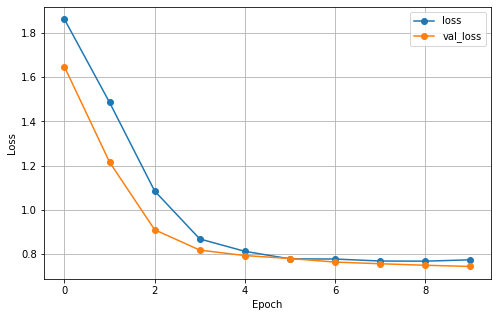

In [53]:
plt.plot(lstm.history['loss'], label='loss', marker = 'o')
plt.plot(lstm.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM Classification

In [54]:
lstm_pred= np.round(model.predict(X_test_final))

6/6 [==============================] - 0s 29ms/step


In [55]:
print('Accuracy %s' % accuracy_score(y_test, lstm_pred))
print('F1-score %s' % f1_score(y_test, lstm_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm_pred))

Accuracy 0.7962962962962963
F1-score [0.         0.88659794 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.80      1.00      0.89       129
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

   micro avg       0.80      0.80      0.80       162
   macro avg       0.11      0.14      0.13       162
weighted avg       0.63      0.80      0.71       162
 samples avg       0.80      0.80      0.80       162



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CNN Classification

In [56]:
#max number of words to be used
max_features = 20000
#max number of words in each lyrics
maxlen = 200
#fixed size
embed_size = 128

batch_size = 64
epochs = 20
filters = 10
kernel_size = 3
hidden_dims = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [57]:
X_train_final[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   95,    1,    7,
       1779,    7, 1779,  101,   91,  134,    1,    7,  311,  588,  588,
        153,    5,   64,  365, 2228,   95,    1,    7, 1779,   20,  524,
          4,  827,   44,    1,    7,   76, 1066, 1066, 1066,  153,    5,
         64,  365, 2228,    1,   11,  112,    4, 1198, 1488,   13,    5,
        105,   94,   26,    8,   83,    4, 1198, 1198,   39,   11,  366,
       1996, 3012,    2,    1,  217,   61,    2,   39,  154,  174,    1,
         59,    4,   19,  206,   61,    2,   39,  154,  174,    1,   59,
          4,   19,   95,    1,    5,  864,  608,  135,  356, 2229,   23,
         33,   76, 1066, 1066, 1066,  153,    5,   

In [58]:
model = Sequential()

model.add(Embedding(max_features, embed_size))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(15))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 10)          3850      
                                                                 
 global_max_pooling1d (Globa  (None, 10)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 15)                165       
                                                                 
 dropout_3 (Dropout)         (None, 15)                0         
                                                      

In [59]:
cnn= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=30, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/30
10/10 [==============================] - 2s 144ms/step - loss: 1.8240 - accuracy: 0.6833 - val_loss: 1.7642 - val_accuracy: 0.8154
Epoch 2/30
10/10 [==============================] - 2s 161ms/step - loss: 1.6794 - accuracy: 0.7556 - val_loss: 1.6013 - val_accuracy: 0.8154
Epoch 3/30
10/10 [==============================] - 2s 213ms/step - loss: 1.5200 - accuracy: 0.7642 - val_loss: 1.4127 - val_accuracy: 0.8154
Epoch 4/30
10/10 [==============================] - 2s 169ms/step - loss: 1.3269 - accuracy: 0.7694 - val_loss: 1.2123 - val_accuracy: 0.8154
Epoch 5/30
10/10 [==============================] - 2s 155ms/step - loss: 1.1737 - accuracy: 0.7642 - val_loss: 1.0519 - val_accuracy: 0.8154
Epoch 6/30
10/10 [==============================] - 2s 156ms/step - loss: 1.0793 - accuracy: 0.7780 - val_loss: 0.9589 - val_accuracy: 0.8154
Epoch 7/30
10/10 [==============================] - 2s 152ms/step - loss: 1.0421 - accuracy: 0.7625 - val_loss: 0.9159 - val_accuracy: 0.8154
Epoch 

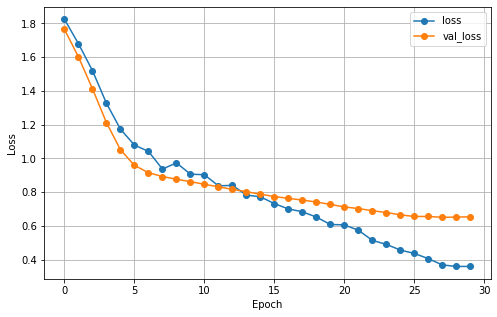

In [60]:
plt.plot(cnn.history['loss'], label='loss', marker = 'o')
plt.plot(cnn.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification

In [61]:
cnn_pred= np.round(model.predict(X_test_final))

6/6 [==============================] - 0s 6ms/step


In [62]:
print('Accuracy %s' % accuracy_score(y_test, cnn_pred))
print('F1-score %s' % f1_score(y_test, cnn_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn_pred, zero_division=1))

Accuracy 0.7839506172839507
F1-score [0.19047619 0.92193309 0.28571429 0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.89      0.96      0.92       129
           2       1.00      0.17      0.29         6
           3       1.00      0.00      0.00         6
           4       1.00      1.00      1.00         0
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1

   micro avg       0.89      0.78      0.83       162
   macro avg       0.98      0.32      0.34       162
weighted avg       0.91      0.78      0.77       162
 samples avg       0.90      0.78      0.78       162



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


#Classification with Word2Vec

In [63]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [64]:
pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [65]:
import gensim
from gensim.models import Word2Vec

In [66]:
df_it['Genre_number'] = df_it['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in df_it['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
   
  if i == 'Metal':
    numbers.append(2)
    
  if i == 'Jazz':
    numbers.append(3)

  if i == 'Folk':
   numbers.append(4)
  
  if i == 'Indie':
   numbers.append(5)
  
  elif i == 'Electronic':
    numbers.append(6)
  

In [67]:
df_it['Genre_number'] = numbers

In [123]:
#Gensim word2vec requires sentences in input so i split the lyrics into sentences
sentence_splitter = nltk.data.load('tokenizers/punkt/italian.pickle')
sentences =[]
sum=0
for lyrics in df_it['Lyrics']:
  sents = sentence_splitter.tokenize(lyrics.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())
print(sum)
print(len(sentences))

808
808


In [124]:
#checking that the sentences are in the correct format
for sent in sentences[:5]:
  print(sent, "\n")

['vid', 'io', 'piú', 'di', 'mille', 'anime', 'distrutte', 'fuggir', 'cosí', 'dinanzi', 'ad', 'un', 'ch', 'al', 'passo', 'passava', 'stige', 'con', 'le', 'piante', 'asciutte', 'dal', 'volto', 'rimovea', 'quell', 'aere', 'grasso', 'menando', 'la', 'sinistra', 'innanzi', 'spesso', 'ahi', 'quanto', 'mi', 'parea', 'pien', 'di', 'disdegno', 'venne', 'a', 'la', 'porta', 'e', 'con', 'una', 'verghetta', 'l', 'aperse', 'che', 'non', 'v', 'ebbe', 'alcun', 'ritegno', 'o', 'cacciati', 'del', 'ciel', 'gente', 'dispetta', 'cominció', 'elli', 'in', 'su', 'l', 'orribil', 'soglia', 'ond', 'esta', 'oltracotanza', 'in', 'coi', 's', 'alletta', 'poi', 'si', 'rivolse', 'per', 'la', 'strada', 'lorda', 'e', 'non', 'fé', 'motta', 'a', 'noi', 'ma', 'fé', 'sembiante', 'd', 'omo', 'cui', 'altra', 'cura', 'stringa', 'e', 'morda', 'death_slytherin'] 

['tuned', 'down', 'a', 'half', 'step', 'chords', 'given', 'in', 'regular', 'tuning', 'intro', 'solo', 'with', 'riff', 'a', 'riff', 'a', 'times', 'riff', 'b', 'times', 

In [125]:
#creating the w2v embeddings
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=10, min_count=1)

In [126]:
w2v_model.train(sentences, epochs=10, total_examples=len(sentences))

(1505551, 1946620)

In [127]:
#total num of extracted words
vocab = w2v_model.wv.index_to_key
print("Total number of words: ", len(vocab))

Total number of words:  16125


In [128]:
w2v_model.wv.most_similar('mille')

[('lacrime', 0.8800086379051208),
 ('emozioni', 0.8259760141372681),
 ('strade', 0.8246115446090698),
 ('delle', 0.8085677623748779),
 ('duomo', 0.8066205382347107),
 ('ore', 0.8021793961524963),
 ('grandi', 0.8001490235328674),
 ('canzoni', 0.7948054671287537),
 ('alle', 0.7940571904182434),
 ('sorridere', 0.7938643097877502)]

In [129]:
#creating a dictionary with words in vocab and their embeddings. It will be used to create the embedding matrix 

word_vec_dict={}

for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

len(word_vec_dict)

16125

In [130]:
#finding the max length of the lyrics
maxi = -1
for i, lyrics in enumerate(df_it['Lyrics']):
  tokens=lyrics.split()
  if(len(tokens)>maxi):
    maxi=len(tokens)

print(maxi)

1282


In [131]:
#integer encoding the words in the lyrics using Keras Tokenizer
tok=Tokenizer()
tok.fit_on_texts(df_it['Lyrics'])
vocab_size = len(tok.word_index) +1
encoded_lyrics = tok.texts_to_sequences(df_it['Lyrics'])

In [132]:
max_lyrics_len=maxi
embed_dim = 300

#padding every sequence to the max length
padded_lyrics=pad_sequences(encoded_lyrics, maxlen=max_lyrics_len, padding='post')
padded_lyrics.shape

(808, 1282)

In [133]:
#creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None: #if the word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    #if the word is not found, the vector corresponding to the embedding will be filled with zeros

In [134]:
Y= to_categorical(df_it['Genre_number'], 7) #transforming the labels into one hot vectors
x_train,x_test,y_train,y_test=train_test_split(padded_lyrics, Y,test_size=0.20,random_state=42)

In [135]:
y_train.shape, y_test.shape

((646, 7), (162, 7))

#LSTM Classification with Word2Vec

---



---



In [136]:
from keras.initializers import Constant


In [137]:
epochs=5
batch_size=64

In [138]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable=False, embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1282, 300)         4836900   
                                                                 
 lstm_4 (LSTM)               (None, 20)                25680     
                                                                 
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                672       
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 7)                 231       
                                                                 
Total params: 4,863,483
Trainable params: 26,583
Non-t

In [139]:
lstm_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm_w2v

Epoch 1/5
9/9 [==============================] - 34s 3s/step - loss: 1.9000 - accuracy: 0.7267 - val_loss: 1.7762 - val_accuracy: 0.7308
Epoch 2/5
9/9 [==============================] - 26s 3s/step - loss: 1.6033 - accuracy: 0.8120 - val_loss: 1.4336 - val_accuracy: 0.7308
Epoch 3/5
9/9 [==============================] - 34s 4s/step - loss: 1.2454 - accuracy: 0.8120 - val_loss: 1.1560 - val_accuracy: 0.7308
Epoch 4/5
9/9 [==============================] - 26s 3s/step - loss: 0.9485 - accuracy: 0.8120 - val_loss: 1.0133 - val_accuracy: 0.7308
Epoch 5/5
9/9 [==============================] - 26s 3s/step - loss: 0.8261 - accuracy: 0.8120 - val_loss: 0.9837 - val_accuracy: 0.7308


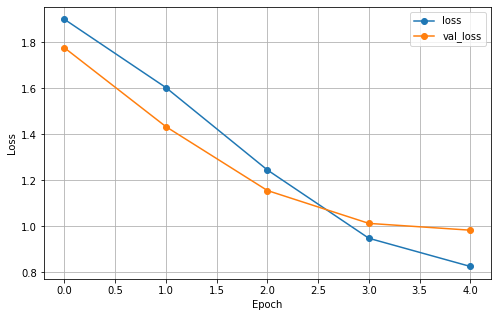

In [140]:
plt.plot(lstm_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(lstm_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM classification with w2v

In [141]:
lstmW2V_pred = np.round(model.predict(x_test))

6/6 [==============================] - 3s 401ms/step


In [142]:
print('Accuracy %s' % accuracy_score(y_test, lstmW2V_pred))
print('F1-score %s' % f1_score(y_test, lstmW2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstmW2V_pred))

Accuracy 0.8580246913580247
F1-score [0.         0.92358804 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.86      1.00      0.92       139
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.86      0.86      0.86       162
   macro avg       0.12      0.14      0.13       162
weighted avg       0.74      0.86      0.79       162
 samples avg       0.86      0.86      0.86       162



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#CNN Classification with Word2Vec

In [143]:
filters=10
kernel_size=3
epochs=20

In [144]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable=False, embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1282, 300)         4836900   
                                                                 
 conv1d_2 (Conv1D)           (None, 1280, 10)          9010      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                352       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                      

In [145]:
cnn_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
cnn_w2v

Epoch 1/20
9/9 [==============================] - 4s 389ms/step - loss: 1.0607 - accuracy: 0.6996 - val_loss: 0.9279 - val_accuracy: 0.7308
Epoch 2/20
9/9 [==============================] - 3s 365ms/step - loss: 0.8252 - accuracy: 0.7965 - val_loss: 0.8558 - val_accuracy: 0.7308
Epoch 3/20
9/9 [==============================] - 3s 363ms/step - loss: 0.7703 - accuracy: 0.8023 - val_loss: 0.8685 - val_accuracy: 0.7308
Epoch 4/20
9/9 [==============================] - 3s 360ms/step - loss: 0.7783 - accuracy: 0.8101 - val_loss: 0.8652 - val_accuracy: 0.7308
Epoch 5/20
9/9 [==============================] - 3s 362ms/step - loss: 0.7382 - accuracy: 0.7984 - val_loss: 0.8807 - val_accuracy: 0.7308


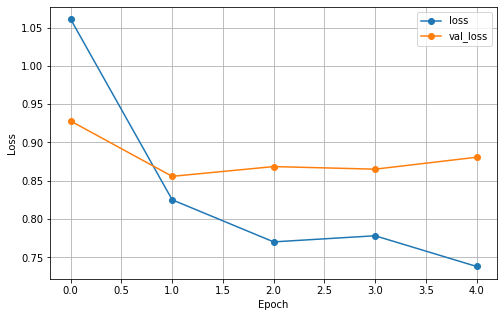

In [146]:
plt.plot(cnn_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(cnn_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN classification with w2v

In [147]:
cnnW2V_pred = np.round(model.predict(x_test))

6/6 [==============================] - 0s 48ms/step


In [148]:
print('Accuracy %s' % accuracy_score(y_test, cnnW2V_pred))
print('F1-score %s' % f1_score(y_test, cnnW2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnnW2V_pred, zero_division=1))

Accuracy 0.8580246913580247
F1-score [0.         0.94557823 0.         0.         0.         0.
 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        15
           1       0.90      1.00      0.95       139
           2       1.00      0.00      0.00         5
           3       1.00      0.00      0.00         2
           4       1.00      1.00      1.00         0
           5       1.00      0.00      0.00         1
           6       1.00      1.00      1.00         0

   micro avg       0.90      0.86      0.88       162
   macro avg       0.99      0.43      0.42       162
weighted avg       0.91      0.86      0.81       162
 samples avg       0.90      0.86      0.86       162



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
